# CIFAR10 CNN Classification

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow 2.x.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


####[CCC-01]
Import modules and set a random seed.

In [0]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(20190610)
tf.random.set_seed(20190610)

####[CCC-02]
Download the CIFAR10 dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

170500096/170498071 [==============================] - 4s 0us/step


####[CCC-03]
Show sample images for each category.

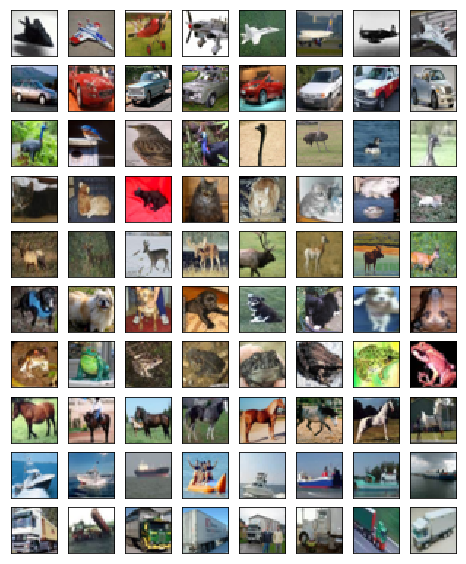

In [4]:
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            c += 1
            subplot = fig.add_subplot(10, 8, c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(train_images[j])
            if c % 8 == 0:
                break

####[CCC-04]
Define the image data generator.

In [0]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

####[CCC-05]
Show some generated images for each category.

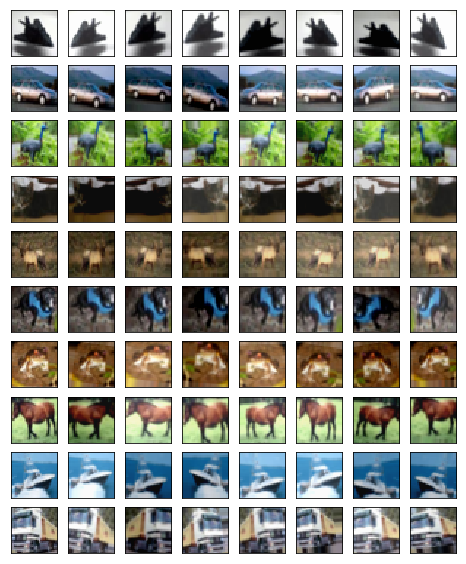

In [6]:
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            break
    c += 1
    subplot = fig.add_subplot(10, 8, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(train_images[j])

    for _ in range(7):
        img = datagen.flow(np.array([train_images[j]]), batch_size=1)[0][0]
        c += 1
        subplot = fig.add_subplot(10, 8, c)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(img)

####[CCC-06]
Define a CNN model.

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        input_shape=(32, 32, 3),
                        name='conv_filter1-1'))
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Dropout(rate=0.25, name='dropout1'))

model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-1'))
model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Dropout(rate=0.25, name='dropout2'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_filter2-2 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)          0

####[CCC-07]
Compile the model using the Adam optimizer, and the cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[CCC-08]
Train the model. It achieves the 82% accuracy.

In [9]:
batch_size = 64
history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=(test_images, test_labels),
    steps_per_epoch=len(train_images) / batch_size,
    epochs=20)

Epoch 1/20
782/781 [==============================] - 84s 107ms/step - loss: 1.7597 - acc: 0.3498 - val_loss: 1.3735 - val_acc: 0.5051
Epoch 2/20
782/781 [==============================] - 80s 102ms/step - loss: 1.4393 - acc: 0.4811 - val_loss: 1.1867 - val_acc: 0.5710
Epoch 3/20
782/781 [==============================] - 80s 103ms/step - loss: 1.2952 - acc: 0.5347 - val_loss: 1.1743 - val_acc: 0.5772
Epoch 4/20
782/781 [==============================] - 80s 103ms/step - loss: 1.2171 - acc: 0.5662 - val_loss: 0.9745 - val_acc: 0.6553
Epoch 5/20
782/781 [==============================] - 81s 103ms/step - loss: 1.1541 - acc: 0.5893 - val_loss: 0.9523 - val_acc: 0.6607
Epoch 6/20
782/781 [==============================] - 80s 103ms/step - loss: 1.0953 - acc: 0.6154 - val_loss: 0.9085 - val_acc: 0.6838
Epoch 7/20
782/781 [==============================] - 81s 103ms/step - loss: 1.0511 - acc: 0.6284 - val_loss: 0.8441 - val_acc: 0.7034
Epoch 8/20
782/781 [==============================] - 8

####[CCC-09]
Plot chars for accuracy and loss values.

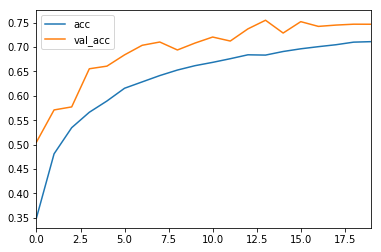

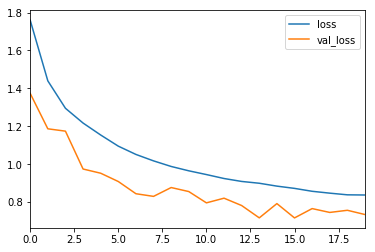

In [10]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()